<a href="https://colab.research.google.com/github/deepshikhaa07/Machine-Learning/blob/main/College_data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Shri Ramdeobaba College of Engineering and Management, Nagpur**

**Department of Electronics Engineering**

**Machine Learning Lab - MINOR PROJECT**


**Name: Deepshikha Singh**

**Roll No.: 1**


---

**Name: Aaryan Babuta**

**Roll No.: 2**


## **Topic: College Data Analysis**


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style='background:#66CDAA; border:0; border-radius: 5px; color:black'><center> TABLE OF CONTENTS </center></h1>

### [**1. IMPORTING LIBRARIES AND LOADING DATA**](#title-one)

### [**2. DATA INFORMATION**](#title-two)

### [**3. EXPLORATORY DATA ANALYSIS**](#title-three)

### [**4. STATISTICAL TESTS**](#title-four)

### [**5. MACHINE LEARNING AND CLUSTER ANALYSIS**](#title-five)

*IMPORTING LIBRARIES*

In [48]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode

In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

*IMPORTING DATASET*

In [50]:
data = pd.read_csv('/content/sample_data/student_clg_performance.csv')

*DATA INFORMATION*

Let's look at our dataset

In [51]:
data

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110
...,...,...
195,4.68,89
196,8.57,118
197,5.85,112
198,6.23,108


Information about two hundred students is presented as well as their average grades and iq level. What is data?
* The cumulative GPA is simply called the CGPA. This is the average student's GPA that he received at the college or university in the courses he took. To qualify for the CGPA, a student's scores for all semesters are added together and divided by the sum of their total credit hours. If there are two semesters in a year, the student receives the CGPA for the year, and the grades for the semester give him the SGPA. So, if the degree course is 8 semesters, just add up the SGPA and divide by 8 to get the student's CGPA.
* An intelligence quotient (IQ) is a total score derived from a set of standardized tests or subtests designed to assess human intelligence. The abbreviation "IQ" was coined by the psychologist William Stern for the German term Intelligenzquotient, his term for a scoring method for intelligence tests at University of Breslau he advocated in a 1912 book.Historically, IQ was a score obtained by dividing a person's mental age score, obtained by administering an intelligence test, by the person's chronological age, both expressed in terms of years and months. The resulting fraction (quotient) was multiplied by 100 to obtain the IQ score. For modern IQ tests, the raw score is transformed to a normal distribution with mean 100 and standard deviation 15.This results in approximately two-thirds of the population scoring between IQ 85 and IQ 115 and about 2.5 percent each above 130 and below 70.

Let's look at the statistics of our dataset.

In [52]:
data.describe().style.background_gradient(cmap = "copper")

,cgpa,iq
count,200.000000,200.000000
mean,6.983400,101.995000
std,1.624101,12.161599
min,4.600000,83.000000
25%,5.407500,91.000000
50%,7.040000,102.000000
75%,8.585000,113.000000
max,9.300000,121.000000


How did a person with an IQ=83 become a college student? Why is the maximum IQ value only 121? It is very interesting in which higher educational institution they collected material for this dataset :)

Hypothesis: There are minor outliers in the iq data.

Let's look at the type of data presented in the dataset.

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cgpa    200 non-null    float64
 1   iq      200 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 3.2 KB


Great, you can immediately start analyzing the data without significant dataset transformations.

*EXPLORATORY DATA ANALYSIS*

Let's evaluate the information gaps in the dataset.

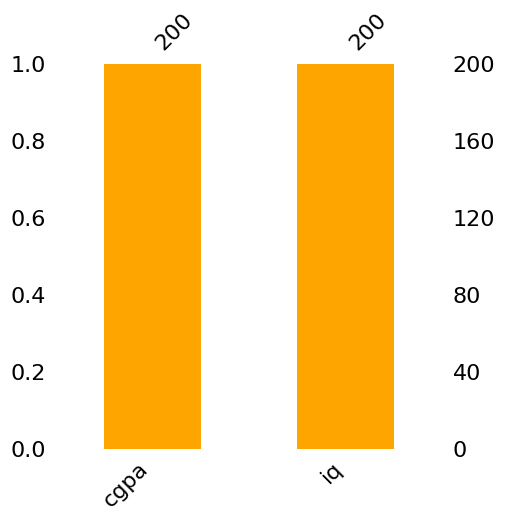

In [54]:
msno.bar(data, figsize = (5,5),color = "orange")
plt.show()

There are no gaps, which means that the dataset will display information that corresponds to reality.

Let's check our dataset for duplicates.

In [55]:
data.duplicated().sum()

7

There are duplicates of information, we will delete them.

In [56]:
data=data.drop_duplicates(keep='last')

Let's carry out a mini analysis of the information present in the dataset.

Text(0.5, 0.98, 'Visualizing continuous columns (train dataset)')

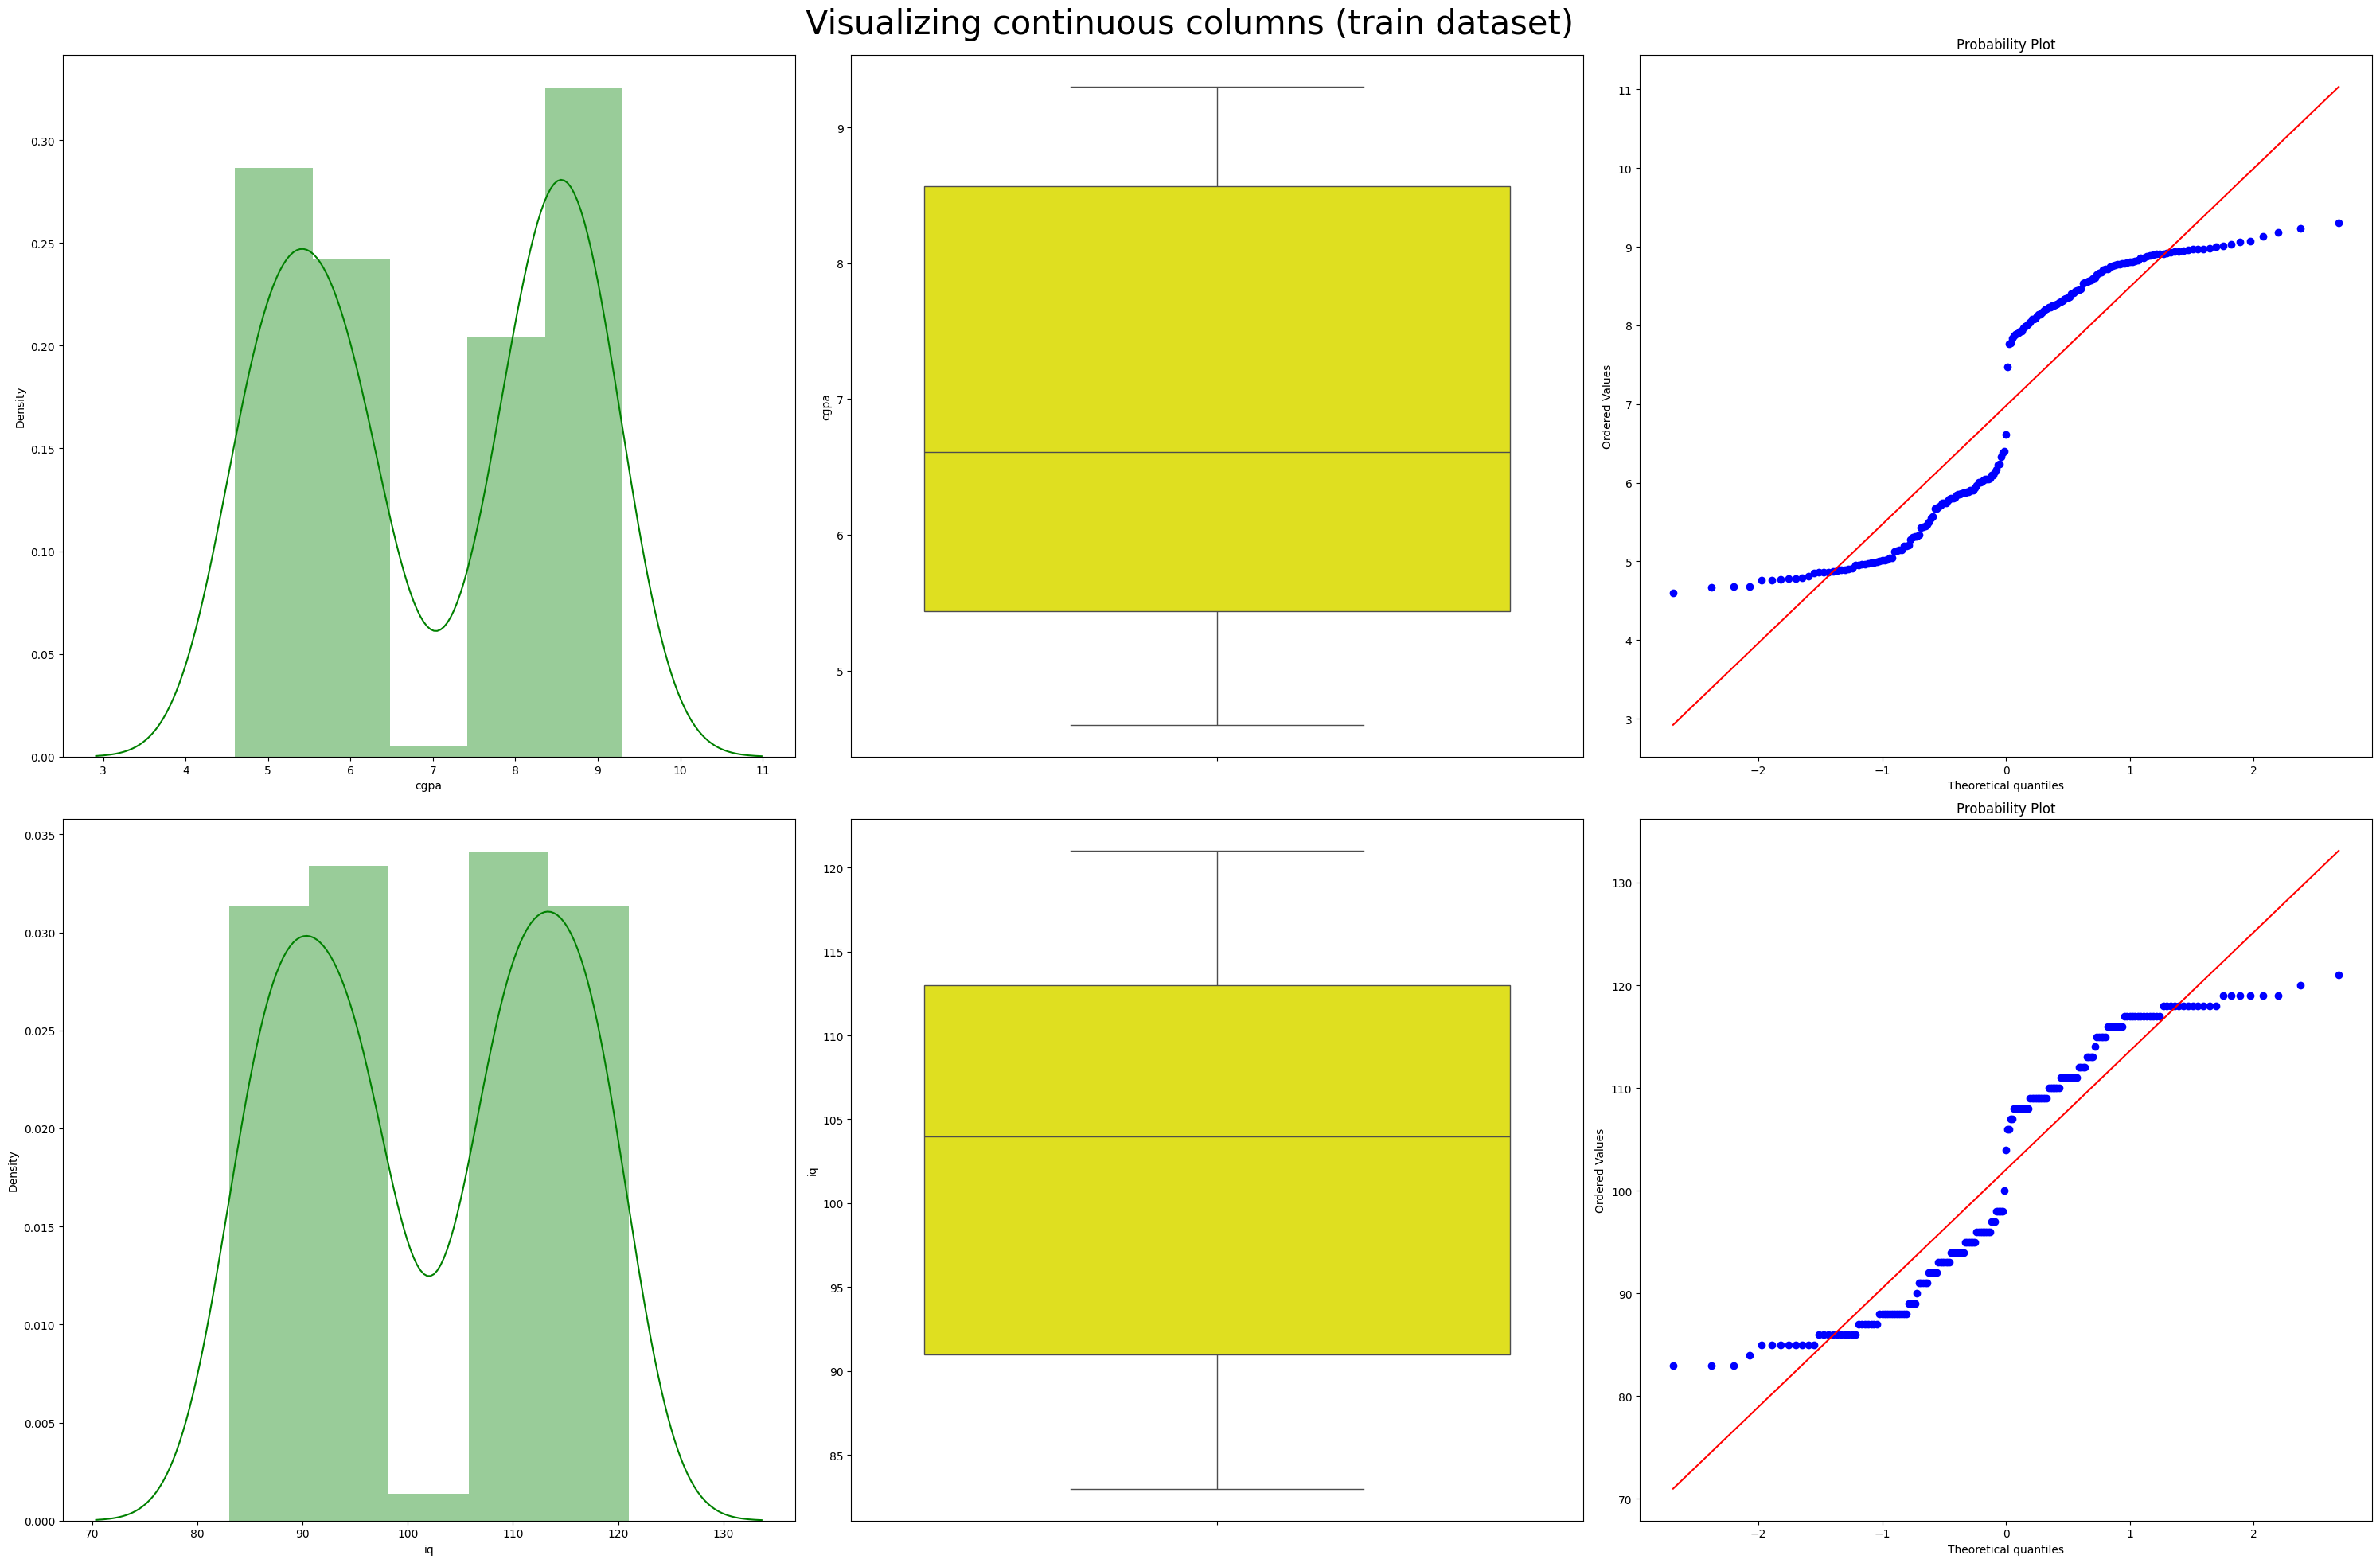

In [57]:
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings to keep output clean

fig, ax = plt.subplots(len(data.columns), 3, figsize=(30, 20))  # Create a grid of subplots for each column
for index, i in enumerate(data.columns):  # Loop over each column in the data
    sns.distplot(data[i], ax=ax[index, 0], color='green')  # Plot a distribution plot in the first column
    sns.boxplot(data[i], ax=ax[index, 1], color='yellow')  # Plot a boxplot in the second column
    stats.probplot(data[i], plot=ax[index, 2])  # Plot a Q-Q plot in the third column

fig.tight_layout()  # Adjust layout to prevent overlapping
fig.subplots_adjust(top=0.95)  # Adjust top margin for title space
plt.suptitle("Visualizing continuous columns (train dataset)", fontsize=30)  # Add a main title


Let's look at the scatter plot.

In [58]:
import plotly.express as px  # Importing Plotly Express for creating visualizations

# Creating a scatter plot with Plotly Express
# 'data' is assumed to be a DataFrame containing the columns 'iq' and 'cgpa'
fig = px.scatter(
    data,                    # The DataFrame containing the data
    x='iq',                  # Setting 'iq' as the x-axis variable
    y='cgpa',                # Setting 'cgpa' as the y-axis variable
    template="ggplot2"       # Applying the 'ggplot2' style template for visual aesthetics
)

# Updating the layout of the figure
fig.update_layout(
    title="Distribution of student indicators"  # Setting the title of the chart
)

# Displaying the figure
fig.show()

What conclusions can be drawn from the presented graphs?
* Feature distributions are bimodal. The modes for CGPA are 5.5 and 8.5, for IQ=90 and 115. This indicates that at least 2 large groups of students are represented in the data.
* The relationship between our features shows that the data is divided into 4 main groups.

<a id="title-four"></a>
<h1 style='background:#66CDAA; border:2; border-radius: 10px; color:black'><center>STATISTICAL TESTS</center></h1>

First, let's explore the relationship of features. To do this, we use a correlation matrix.

In [59]:
correlation = data.corr()
print(correlation['iq'].sort_values(ascending = False),'\n')

iq      1.000000
cgpa    0.517675
Name: iq, dtype: float64 



There is a weak correlation between the two traits.

Let us check the hypotheses about the normality of the distribution of features. It follows from the distribution plots that the distribution is not normal and has a bimodal distribution.

In [60]:
# Shapiro-Wilk Test
from scipy.stats import shapiro  # Import the Shapiro-Wilk test function

# Perform normality test on each feature in data
for feature in data.columns:
    stat, p = shapiro(data[feature])  # Calculate test statistic and p-value
    print('Statistics=%.3f, p=%.3f' % (stat, p))  # Print test statistic and p-value

    # Set significance level
    alpha = 0.05
    if p > alpha:  # If p-value is greater than alpha
        print(f'Sample {feature} looks Gaussian (fail to reject H0)')  # Indicates normal distribution
    else:  # If p-value is less than alpha
        print(f'Sample {feature} does not look Gaussian (reject H0)')  # Indicates non-normal distribution


Statistics=0.853, p=0.000
Sample cgpa does not look Gaussian (reject H0)
Statistics=0.894, p=0.000
Sample iq does not look Gaussian (reject H0)


Hypothesis confirmed :)

<a id="title-five"></a>
<h1 style='background:#66CDAA; border:2; border-radius: 10px; color:black'><center>MACHINE LEARNING AND CLUSTER ANALYSIS</center></h1>

To confirm the assumption about the expediency of clustering in 4 groups, we will conduct a small experiment with partitioning our space into clusters using the k-means algorithm.

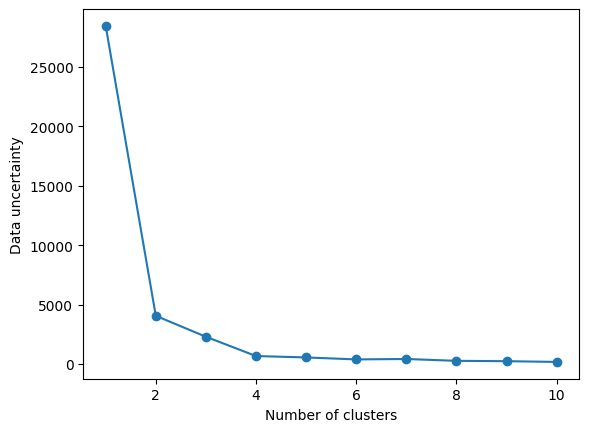

In [61]:
from sklearn.cluster import KMeans  # Import KMeans for clustering

wcss = []  # List to store within-cluster sum of squares (WCSS) for each k
for i in range(1, 11):  # Loop through cluster numbers from 1 to 10
    km = KMeans(n_clusters=i)  # Initialize KMeans with i clusters
    km.fit_predict(data)  # Fit and predict clusters for the data
    wcss.append(km.inertia_)  # Append the inertia (WCSS) to the list

# Plot the WCSS values to find the optimal number of clusters
fig, ax = plt.subplots()
ax.plot(range(1, 11), wcss, '-o')  # Plot WCSS against number of clusters

ax.set_xlabel('Number of clusters')  # Label x-axis
ax.set_ylabel('Data uncertainty')  # Label y-axis

plt.show()  # Display the plot


The hypothesis about the division of space into 4 main groups was confirmed. Is it possible to carry out a correlation analysis, so that it would be possible to predict his average grades by the value of a student's IQ? Let's try!

In [62]:
# Define the target variable 'y' as the 'cgpa' column from the data
y = data['cgpa']

# Define the training data 'train' by dropping the 'cgpa' column,
# so all remaining columns will be used as input features.
train = data.drop(['cgpa'], axis=1)

In [63]:
# Split the dataset into training and testing sets.
# We use an 80-20 split, with 80% of data for training and 20% for testing,
# and set a random state for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=42)

In [64]:
# Define a list of regression models to train and evaluate
models = [
    RandomForestRegressor(),       # Random Forest model for regression
    LinearRegression(),            # Linear Regression model
    ElasticNet(),                  # ElasticNet, a linear model with combined L1 and L2 regularization
    KNeighborsRegressor(),         # K-Nearest Neighbors Regressor
    xgb.XGBRegressor()             # XGBoost Regressor
]

# Dictionary to store performance metrics for each model
scores = dict()

# Loop through each model, train it on the training set, and evaluate on the test set
for m in models:
    m.fit(X_train, y_train)       # Fit the model on the training data
    y_pred = m.predict(X_test)    # Predict on the test data

    # Output the model type and performance metrics
    print(f'model: {str(m)}')                              # Print the model name
    print(f'RMSE: {mean_squared_error(y_test, y_pred)}')   # Calculate and print RMSE
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')   # Calculate and print MAE
    print('-'*30, '\\n')                                   # Print a separator for readability


model: RandomForestRegressor()
RMSE: 0.08332543710853028
MAE: 0.22250151051589284
------------------------------ \n
model: LinearRegression()
RMSE: 1.8437297639722294
MAE: 1.2888776437975715
------------------------------ \n
model: ElasticNet()
RMSE: 1.8503427208771603
MAE: 1.3020177993809559
------------------------------ \n
model: KNeighborsRegressor()
RMSE: 0.09210779487179496
MAE: 0.20641025641025662
------------------------------ \n
model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
       

The hypothesis that the value of the average grade can be predicted from the student's IQ was confirmed.